In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

!apt-get -y install fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

## 주식 데이터

In [2]:
pola_stock = pd.read_csv('../data/get_stock.polaris.csv')

In [3]:
pola_stock = pola_stock.dropna(subset=['date'])

In [4]:
# 전일비 변환작업 및 null값 업데이트

for i in range(len(pola_stock)-1):    
    daily_change = pola_stock['end_price'].iloc[i] - pola_stock['end_price'].iloc[i+1]
    pola_stock['daily_change'].iloc[i] = daily_change

    if i == len(pola_stock)-1:
        pola_stock['daily_change'].iloc[len(pola_stock)] = int(pola_stock['daily_change'].iloc[len(pola_stock)])

## 토큰 데이터

In [5]:
pola_token_get = pd.read_json('../data/pola_token.json')

In [6]:
pola_token_get['data']

t    [1605711600000, 1605798000000, 1605884400000, ...
o    [30.01, 482.9, 595.6, 550, 475.2, 3600, 2960, ...
h    [670, 697.5, 648.1, 600.6, 5000, 3944, 4015, 3...
l    [30.01, 354.6, 527.2, 451.6, 475.2, 2220, 2099...
c    [481, 596, 569.8, 483.5, 3640, 2933, 2821, 801...
v    [97047175.524635668613744039, 684675710.297753...
Name: data, dtype: object

In [7]:
pola_token = pd.DataFrame()
pola_token['timestamp'] = pola_token_get['data'][0]
pola_token['open_price'] = pola_token_get['data'][1]
pola_token['high_price'] = pola_token_get['data'][2]
pola_token['low_price'] = pola_token_get['data'][3]
pola_token['close_price'] = pola_token_get['data'][4]
pola_token['trade_volume'] = pola_token_get['data'][5]

In [8]:
pola_token

,timestamp,open_price,high_price,low_price,close_price,trade_volume
0,1605711600000,30.01,670,30.01,481,97047175.524635668613744039
1,1605798000000,482.9,697.5,354.6,596,684675710.297753710545601948
2,1605884400000,595.6,648.1,527.2,569.8,959839313.520329676084903356
3,1605970800000,550,600.6,451.6,483.5,9698525.496211397492328175
4,1606057200000,475.2,5000,475.2,3640,67830701.70380660742383707
...,...,...,...,...,...,...
1246,1713366000000,56.5,58,51.2,54.16,51958548.788103589176785507
1247,1713452400000,54.16,54.33,46,52.16,42951779.193584789613648723
1248,1713538800000,52.17,52.17,49.38,51.17,15439860.527550924633344107
1249,1713625200000,51.18,53.77,50.67,51.97,22002388.083048372683249285


In [9]:
import datetime

def change_datetime(text):

    # Epoch time을 기준으로 한 초 단위로 변환
    timestamp_s = text / 1000

    # 한국 시간대로 변환
    korea_time = datetime.datetime.utcfromtimestamp(timestamp_s) + datetime.timedelta(hours=9)

    korea_time = korea_time.strftime('%Y-%m-%d')

    return korea_time

In [10]:
pola_token['timestamp'] = pola_token['timestamp'].apply(change_datetime)

In [11]:
pola_token['timestamp'] = pd.to_datetime(pola_token['timestamp'])

In [12]:
pola_token

,timestamp,open_price,high_price,low_price,close_price,trade_volume
0,2020-11-19,30.01,670,30.01,481,97047175.524635668613744039
1,2020-11-20,482.9,697.5,354.6,596,684675710.297753710545601948
2,2020-11-21,595.6,648.1,527.2,569.8,959839313.520329676084903356
3,2020-11-22,550,600.6,451.6,483.5,9698525.496211397492328175
4,2020-11-23,475.2,5000,475.2,3640,67830701.70380660742383707
...,...,...,...,...,...,...
1246,2024-04-18,56.5,58,51.2,54.16,51958548.788103589176785507
1247,2024-04-19,54.16,54.33,46,52.16,42951779.193584789613648723
1248,2024-04-20,52.17,52.17,49.38,51.17,15439860.527550924633344107
1249,2024-04-21,51.18,53.77,50.67,51.97,22002388.083048372683249285


In [13]:
pola_token['close_price'] = pola_token['close_price'].apply(float)

In [14]:
pola_stock = pola_stock.drop(columns='_id')
pola_stock['date'] = pd.to_datetime(pola_stock['date'])


In [15]:
pola_stock = pola_stock.sort_values('date')

## 뉴스 데이터

In [16]:
office_news = pd.read_csv('../data/news_get.daum_office_news.csv')

In [17]:
share_news = pd.read_csv('../data/news_get.daum_news_share.csv')

In [18]:
len(share_news)

36

- share뉴스의 갯수가 36개 밖에 안되기 때문에 뉴스를 통합하고 중복 뉴스 제거"

In [19]:
news_total = pd.concat([office_news,share_news])

In [20]:
news_total = news_total.drop(columns='_id').drop_duplicates().sort_values('news_date')

In [21]:
news_total = news_total.drop(columns='news_brand').query('news_date.notna()')

In [22]:
news_total['news_date'] = pd.to_datetime(news_total['news_date'].str.split().str[:3].str.join(' '), format="%Y. %m. %d.")

In [23]:
news_total.shape

(800, 3)

- 총 800개의 뉴스 데이터를 수집

## 시각화
- 뉴스 데이터가 2022-01-01부터 수집되었으므로 토큰과 주식의 그 전데이터는 삭제해준다.

In [24]:
pola_stock_total = pola_stock.copy()

pola_stock = pola_stock.query('date > "2021-12-31"')
pola_token = pola_token.query('timestamp > "2021-12-31"')

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

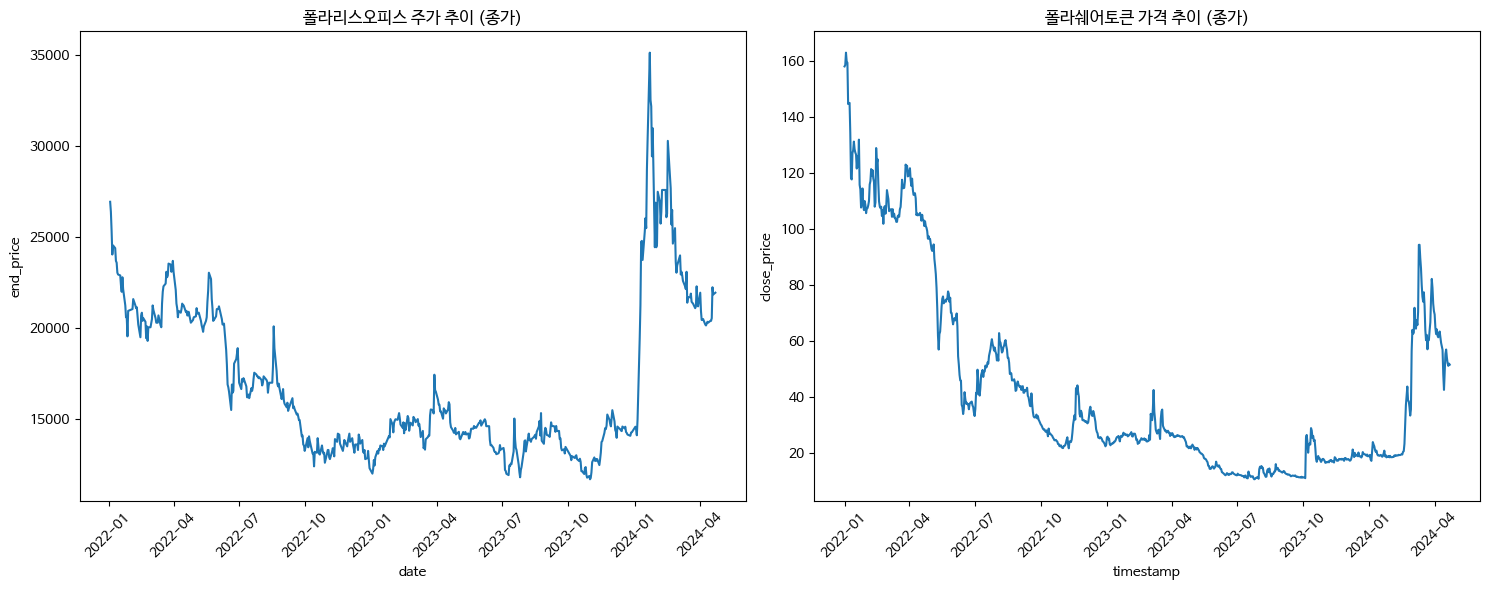

In [26]:
plt.rcParams['font.family'] = 'NanumBarunGothic'

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=pola_stock, x='date', y='end_price')
plt.xticks(rotation = 45)
plt.title('폴라리스오피스 주가 추이 (종가)')

plt.subplot(1, 2, 2)
sns.lineplot(data=pola_token, x='timestamp', y='close_price')
plt.xticks(rotation = 45)
plt.title('폴라쉐어토큰 가격 추이 (종가)')

plt.tight_layout()

plt.show()

### 토큰 전일비 고가 추출

In [27]:
pola_token['daily_change'] = pola_token['close_price'] - pola_token['open_price'].apply(float)

In [28]:
pola_token['check_point'] = (pola_token['daily_change'] / pola_token['close_price']) > 0.1
pola_token['check_point_rate'] = (pola_token['daily_change'] / pola_token['close_price'])

In [29]:
df_check = pola_token.query('check_point == True')

- 일일 10%이상 급등한 날 추출

In [30]:
check_date_list = df_check['timestamp']

In [31]:
check_date_list

452    2022-02-14
575    2022-06-17
591    2022-07-03
593    2022-07-05
623    2022-08-04
721    2022-11-10
730    2022-11-19
773    2023-01-01
834    2023-03-03
837    2023-03-06
838    2023-03-07
848    2023-03-17
925    2023-06-02
970    2023-07-17
985    2023-08-01
996    2023-08-12
1008   2023-08-24
1050   2023-10-05
1054   2023-10-09
1057   2023-10-12
1090   2023-11-14
1142   2024-01-05
1143   2024-01-06
1187   2024-02-19
1188   2024-02-20
1189   2024-02-21
1197   2024-02-29
1198   2024-03-01
1201   2024-03-04
1207   2024-03-10
1224   2024-03-27
1243   2024-04-15
1244   2024-04-16
Name: timestamp, dtype: datetime64[ns]

In [32]:
df_check_date_count = pd.DataFrame()

for i in check_date_list:
    df_check_date_count = pd.concat([df_check_date_count,news_total.query(f'news_date == "{i}"')])

In [33]:
df_check_date_count['news_date'].value_counts().index

DatetimeIndex(['2024-02-29', '2024-03-04', '2023-08-24', '2024-04-15',
               '2024-01-05', '2023-10-05', '2024-03-27', '2024-02-20',
               '2023-03-07', '2022-06-17', '2023-03-17', '2024-01-06'],
              dtype='datetime64[ns]', name='news_date', freq=None)

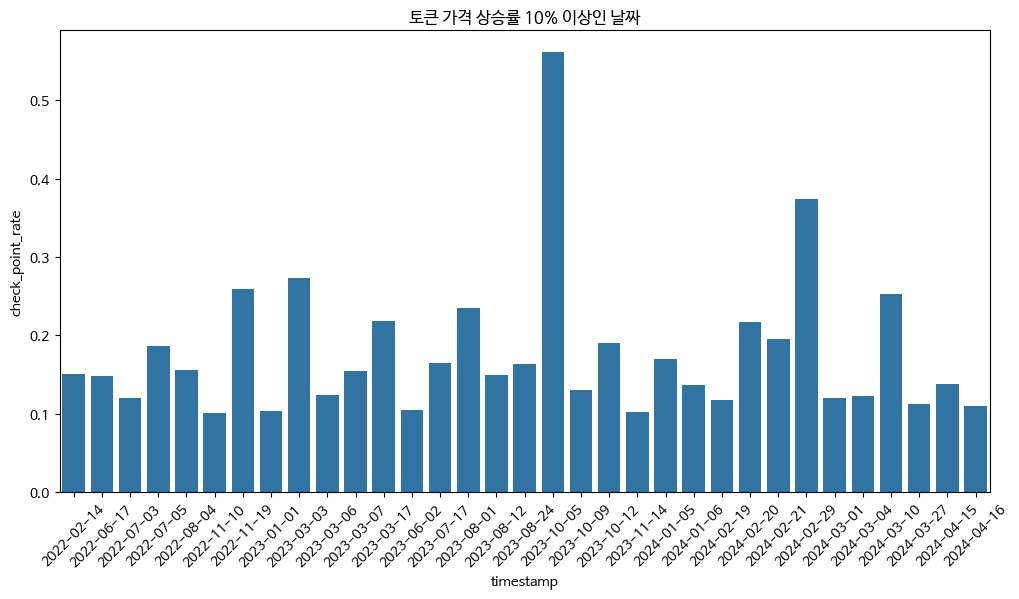

In [34]:
plt.figure(figsize=(12, 6))


sns.barplot(data=df_check, x='timestamp', y='check_point_rate')


plt.xticks(rotation = 45)
plt.title('토큰 가격 상승률 10% 이상인 날짜')

plt.show()

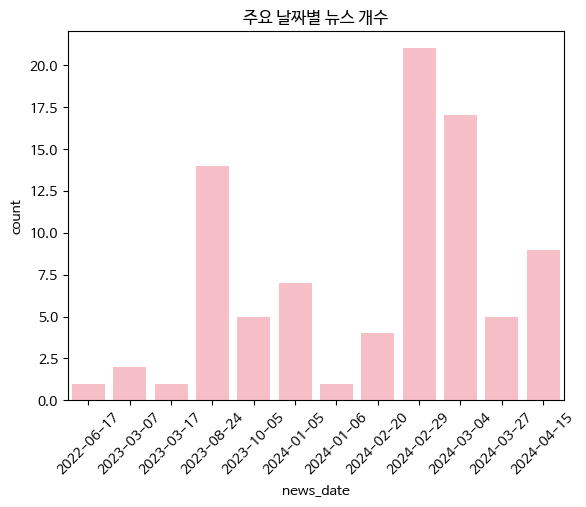

In [35]:
sns.countplot(data=df_check_date_count,x='news_date',color='lightpink')
plt.xticks(rotation = 45)
plt.title('주요 날짜별 뉴스 개수')

plt.show()


## 뉴스 LDA 분석

In [36]:
# 영어, 한글만 선택
import re

def replace_text(text):
    text = text.replace('\\n',' ')
    text = re.sub(r'[^a-zA-Z가-힣\s]',' ',text)
    return text 

In [37]:
df_check_date_count['newText'] = df_check_date_count['news_title'] + ' ' + df_check_date_count['news_contents']
df_check_date_count['newText'] = df_check_date_count['newText'].apply(replace_text)

### 토큰, 벡터라이징

In [38]:
from konlpy.tag import Okt
stopword = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게','의','가','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# Okt 형태소 분석기 인스턴스 생성
okt = Okt()

import numpy as np


# 토크나이징 함수 정의
def tokenizer(raw, pos=["Noun","Alpha","Verb","Number"], stopword=stopword):

  get_list = []

  for word, tag in okt.pos(raw,norm=True,stem=True):
    if len(word) <= 1:
      word = '공란'

    if tag in pos and word not in stopword:
      get_list.append(word)
    else:
      get_list.append('공란')
    pass


  return get_list

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenizer, use_idf=True)

### 군집 최적화
- CoherenceModel 사용

In [40]:
from scipy.linalg import triu

In [41]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.matutils import Sparse2Corpus

In [42]:
def Coherence_point(vectorizer,input_text_list):
  k_range = range(2,11)

  best_n = -1
  best_score = -1
  best_score_list = []
  preprocessed_texts = []
    

  for i in input_text_list:
      preprocessed_texts.append(tokenizer(i))
    

  for k in k_range:

      features = vectorizer.fit_transform(input_text_list)

      from sklearn.decomposition import LatentDirichletAllocation

      lda_model = LatentDirichletAllocation(n_components=k, random_state=42) #인스턴스화 #n_components 토픽의 갯수
      lda_model.fit(features) #교육

      # Gensim 사전 생성
      dictionary = Dictionary(preprocessed_texts)    

      # Gensim 코퍼스 생성
      corpus = [dictionary.doc2bow(text) for text in preprocessed_texts]


      # 상위 10개 단어를 추출, 비교
      topic_words = [[dictionary[id] for id in topic.argsort()[-10:]] for topic in lda_model.components_]


      # CoherenceModel 생성
      coherence_model = CoherenceModel(topics=topic_words, texts=preprocessed_texts, dictionary=dictionary, coherence='c_v')

      # 일관성 점수 계산
      coherence_score = coherence_model.get_coherence()
      
      
      # clusters = lda_model.transform(features).argmax(axis=1)  # 각 문서의 클러스터 할당

      
      # score = silhouette_score(features,clusters)

      print('k :',k,'score :',coherence_score)

      if coherence_score > best_score:
          best_n = k
          best_score = coherence_score

  print('best n :', best_n, 'best score :', best_score)
  print('---------------------------------------------')
  best_score_list.append(best_n)

  return best_score_list

In [43]:
best_score = []
counter = 0

for i in df_check_date_count['news_date'].unique():

  # 해당 날짜 추출
  processing_df = df_check_date_count[(df_check_date_count['news_date'] == i)]
    
  print(f'{i} 의 점수')
    
  # 토픽 추출
  # try:
  best_score.append(Coherence_point(vectorizer,processing_df['newText']))
  # except:
  #   best_score.append(f'오류 발생 : {counter}번재 날짜')
  #   print('-------------------------------------------')

  counter += 1

2022-06-17 00:00:00 의 점수
k : 2 score : 0.3882454835475277
k : 3 score : 0.3882454835475277
k : 4 score : 0.3882454835475277
k : 5 score : 0.36832294486188827
k : 6 score : 0.3674928390833199
k : 7 score : 0.3668999063843426
k : 8 score : 0.39094431896521614
k : 9 score : 0.21421737770986993
k : 10 score : 0.25638599962528275
best n : 8 best score : 0.39094431896521614
---------------------------------------------
2023-03-07 00:00:00 의 점수
k : 2 score : 0.5044493688896685
k : 3 score : 0.43490847141760886
k : 4 score : 0.5046245348962324
k : 5 score : 0.48694583447025624
k : 6 score : 0.45693831998580353
k : 7 score : 0.45375770554132583
k : 8 score : 0.44061533221155913
k : 9 score : 0.39107316150844207
k : 10 score : 0.5103856214308553
best n : 10 best score : 0.5103856214308553
---------------------------------------------
2023-03-17 00:00:00 의 점수
k : 2 score : 0.25244229677476276
k : 3 score : 0.22459275935656575
k : 4 score : 0.23952188014009962
k : 5 score : 0.24051715485900188
k :

In [44]:
get_score = list()
for i in best_score:
    for j in i:
        get_score.append(j)

In [45]:
get_score

[8, 10, 10, 6, 4, 6, 10, 4, 9, 5, 3, 4]

### LDA 진행

In [46]:
# 추출 함수 제작

def LDAs(vectorizer,input_text_list,n_compo):

  features = vectorizer.fit_transform(input_text_list)

  # 단어 사전 추출
  dictionary_list = vectorizer.get_feature_names_out()

  # LDA 학습
  from sklearn.decomposition import LatentDirichletAllocation
  lda_model = LatentDirichletAllocation(n_components=n_compo, random_state=42) #인스턴스화 #n_components 토픽의 갯수
  lda_model.fit(features) #교육

  ## 상위 단어 추출
  ## 0 확률 1은 dictionary
  topics_list = list()
  for topic in lda_model.components_:
      df_datas = [topic, dictionary_list]
      df_topics = pd.DataFrame(data=df_datas)
      df_topics= df_topics.T
      df_topics = df_topics.sort_values(0, ascending=False)

      topics_text = ' '.join(df_topics[1].values[:10])# 시리즈 형식으로 출력 get values from series / index
      topics_list.append(topics_text)

  return topics_list

In [47]:
get_topics = []
counter = 0
for i in df_check_date_count['news_date'].unique():
    
  # 해당 날짜 추출
  processing_df = df_check_date_count[(df_check_date_count['news_date'] == i)]

  # 토픽 추출
  try:
    get_topics.append(LDAs(vectorizer,processing_df['newText'],get_score[counter]))
  except:
    get_topics.append(f'오류 발생 : {counter}번재 csv')

  counter += 1

In [48]:
df_check_date_count.query('news_date == "2024-04-15"')
# ['news_contents'].iloc[0]

,news_title,news_date,news_contents,newText
829,"폴라리스오피스, .과기부 국책과제 공동연구개발기관 선정",2024-04-15,[서울=뉴시스] 김경택 기자 = 폴라리스오피스는 과학기술정보통신부의 신규 국책과제에...,폴라리스오피스 과기부 국책과제 공동연구개발기관 선정 서울 뉴시스 김경택 기자...
830,"폴라리스오피스, 클라우드 기반 문서 AI 고도화 및 실증...과기부 국책과제 선정",2024-04-15,폴라리스오피스가 과학기술정보통신부의 신규 국책과제에 공동연구개발기관으로 선정됐다고 ...,폴라리스오피스 클라우드 기반 문서 AI 고도화 및 실증 과기부 국책과제 선정 ...
831,"폴라리스오피스, 클라우드 기반 문서 AI 고도화 및 실증...과기부 국책과제 선정",2024-04-15,폴라리스오피스 CI\n[파이낸셜뉴스] 폴라리스오피스가 과학기술정보통신부의 신규 국책...,폴라리스오피스 클라우드 기반 문서 AI 고도화 및 실증 과기부 국책과제 선정 ...
832,"폴라리스오피스, 클라우드 기반 문서 AI 고도화 및 실증…과기부 국책과제 선정",2024-04-15,폴라리스오피스가 과학기술정보통신부의 신규 국책과제에 공동연구개발기관으로 선정됐다고 ...,폴라리스오피스 클라우드 기반 문서 AI 고도화 및 실증 과기부 국책과제 선정 폴라...
833,"폴라리스오피스, 과기부 국책과제 공동연구개발기관 선정",2024-04-15,[이데일리 이정현 기자] 폴라리스오피스(041020)는 과학기술정보통신부의 신규 국...,폴라리스오피스 과기부 국책과제 공동연구개발기관 선정 이데일리 이정현 기자 폴라...
834,"이노그리드, 50억 규모 AI 서비스형플랫폼 개발 총괄 맡아",2024-04-15,[이 기사에 나온 스타트업에 대한 보다 다양한 기업정보는 유니콘팩토리 빅데이터 플랫...,이노그리드 억 규모 AI 서비스형플랫폼 개발 총괄 맡아 이 기사에 나온 스타...
835,"이노그리드, 50억 규모 'AI 서비스형플랫폼' 개발 과제 수주",2024-04-15,"주관사업자로 '기술 개발→플랫폼 구축→산업 실증' 전 과정 주도\n""AI에 최적화된...",이노그리드 억 규모 AI 서비스형플랫폼 개발 과제 수주 주관사업자로 기술...
836,"이노그리드, AI 최적화된 PaaS 기술 개발 과제 수주",2024-04-15,이노그리드 로고 이미지\n이노그리드가 과학기술정보통신부와 정보통신기획평가원(IITP...,이노그리드 AI 최적화된 PaaS 기술 개발 과제 수주 이노그리드 로고 이미지 이...
837,"""AI에 최적화한 PaaS 개발""···이노그리드, 50억 사업 수주",2024-04-15,2026년까지 3년간 진행...써로마인드·KISTI·바이오브레인·소프트온넷·폴라리스...,AI에 최적화한 PaaS 개발 이노그리드 억 사업 수주 년까지 ...


In [49]:
# 뉴스 별 토픽 추출
total_counter = 0
for i in get_score:
  list_counter = 0
  for j in range(i):
    list_counter += 1
    print(f'{df_check_date_count["news_date"].unique()[total_counter]}날짜 {list_counter}번째 토픽 : {get_topics[total_counter][j]}')

  total_counter += 1

  print('--------------------------------------')

2022-06-17 00:00:00날짜 1번째 토픽 : 관광 운영 제주 시키다 돼다 이다 주민 케이 공간 질그랭
2022-06-17 00:00:00날짜 2번째 토픽 : 관광 운영 제주 시키다 돼다 이다 주민 케이 공간 질그랭
2022-06-17 00:00:00날짜 3번째 토픽 : 관광 운영 제주 시키다 돼다 이다 주민 케이 공간 질그랭
2022-06-17 00:00:00날짜 4번째 토픽 : 공란 마을 케이 공간 주민 운영 제주 관광 시키다 돼다
2022-06-17 00:00:00날짜 5번째 토픽 : 관광 운영 제주 시키다 돼다 이다 주민 케이 공간 질그랭
2022-06-17 00:00:00날짜 6번째 토픽 : 관광 운영 제주 시키다 돼다 이다 주민 케이 공간 질그랭
2022-06-17 00:00:00날짜 7번째 토픽 : 관광 운영 제주 시키다 돼다 이다 주민 케이 공간 질그랭
2022-06-17 00:00:00날짜 8번째 토픽 : 관광 운영 제주 시키다 돼다 이다 주민 케이 공간 질그랭
--------------------------------------
2023-03-07 00:00:00날짜 1번째 토픽 : 흑자 해당 늘다 시가 제기 지급 배당률 돼다 서울 db
2023-03-07 00:00:00날짜 2번째 토픽 : 공란 공시 이용성 관련 현저 요구 변동 오피스 조회 폴라리스
2023-03-07 00:00:00날짜 3번째 토픽 : 흑자 해당 늘다 시가 제기 지급 배당률 돼다 서울 db
2023-03-07 00:00:00날짜 4번째 토픽 : 흑자 해당 늘다 시가 제기 지급 배당률 돼다 서울 db
2023-03-07 00:00:00날짜 5번째 토픽 : 흑자 해당 늘다 시가 제기 지급 배당률 돼다 서울 db
2023-03-07 00:00:00날짜 6번째 토픽 : 흑자 해당 늘다 시가 제기 지급 배당률 돼다 서울 db
2023-03-07 00:00:00날짜 7번째 토픽 : 흑자 해당 늘다 시가 제기 지급 배당률 돼다 서울 db
2023-03-07 00:00:00날짜

## 토큰 가격 예측
- AI테마가 적용되었던 3월부터 1년간 학습하여 앞으로의 가격을 예측하여 보자
- 모델은 최근 시계열 예측에 좋은 성능을 보이는 프로핏 사용

In [50]:
from prophet import Prophet

model = Prophet()


- ai 토픽을 계속해서 진행하여 지금과 같은 결과를 얻었을 경우

In [51]:
fit_token_data = pd.DataFrame()


fit_token_data['ds'] = pola_token['timestamp']
fit_token_data['y'] = pola_token['close_price']

In [52]:
model.fit(fit_token_data)

02:35:58 - cmdstanpy - INFO - Chain [1] start processing


02:35:58 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
future_dates = model.make_future_dataframe(periods=365)

In [54]:
forecast = model.predict(future_dates)

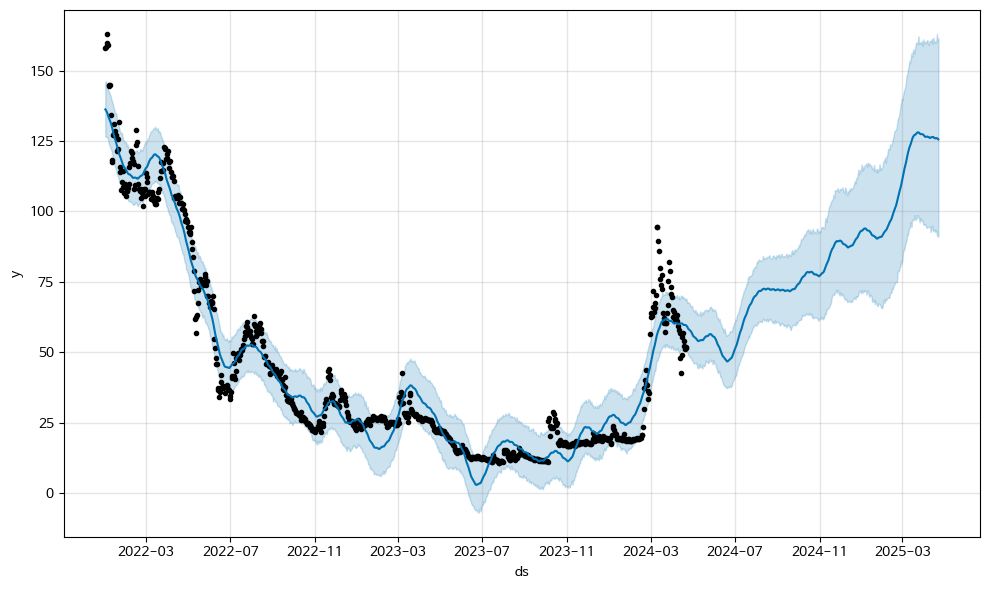

In [55]:
fig = model.plot(forecast)

- 기존 블록체인의 롱런 전략을 택했을 경우

In [56]:
model_unai = Prophet()

In [57]:
model_unai.fit(fit_token_data.query('ds < "2024-01-01"'))

02:35:59 - cmdstanpy - INFO - Chain [1] start processing


02:35:59 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
future_dates_un = model_unai.make_future_dataframe(periods=365)

In [59]:
forecast_un = model_unai.predict(future_dates_un)

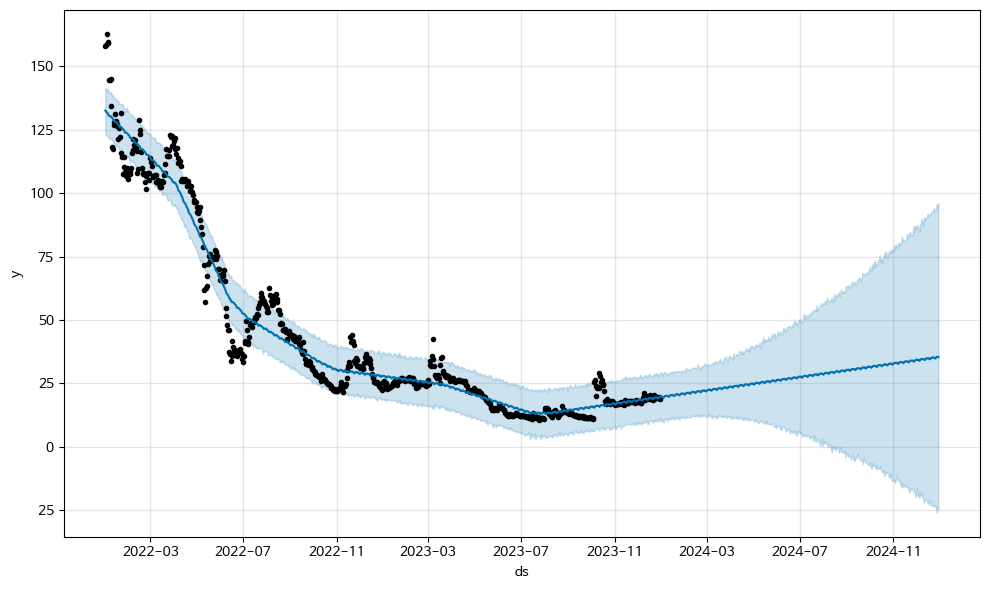

In [60]:
fig_un = model_unai.plot(forecast_un)

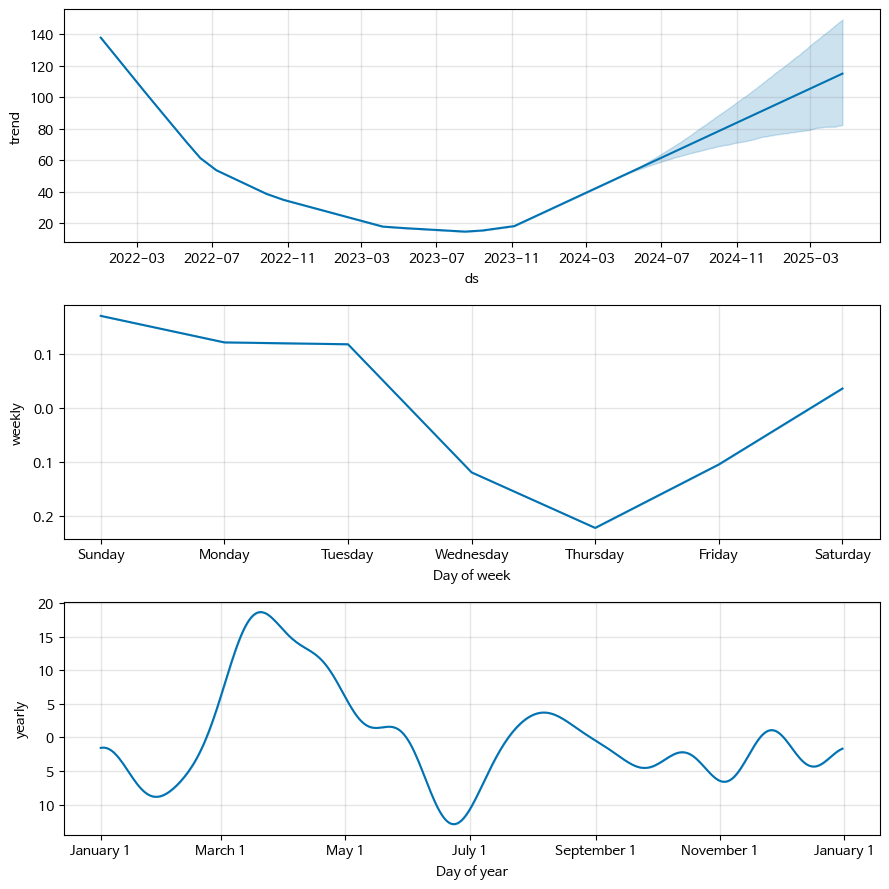

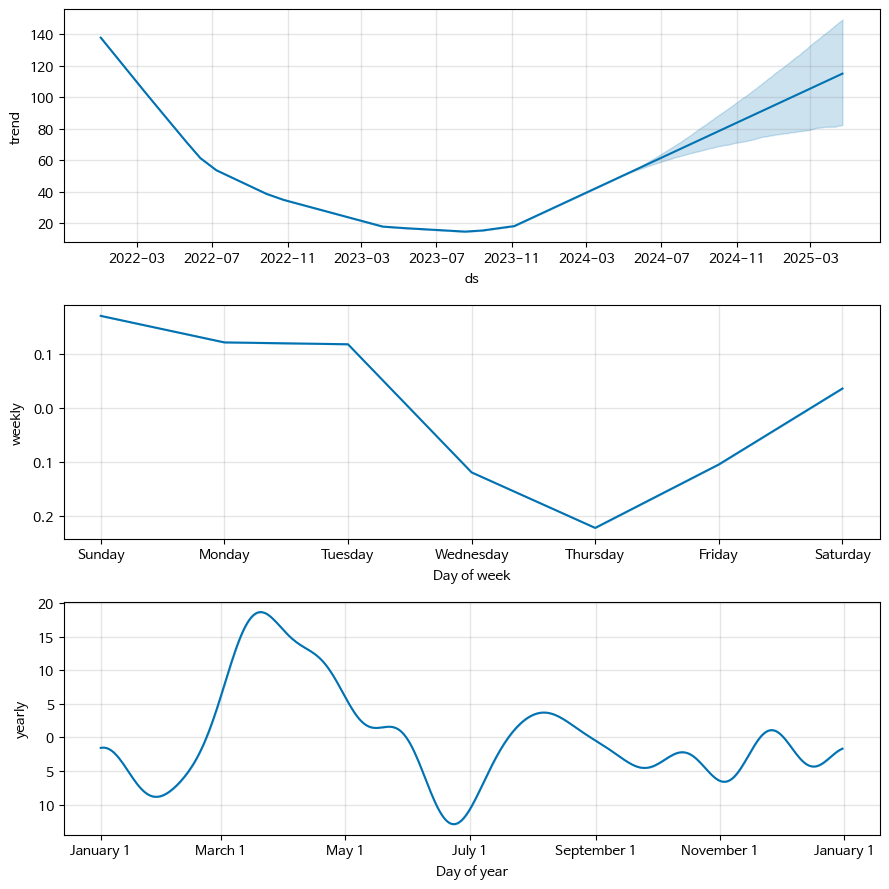

In [61]:
model.plot_components(forecast)

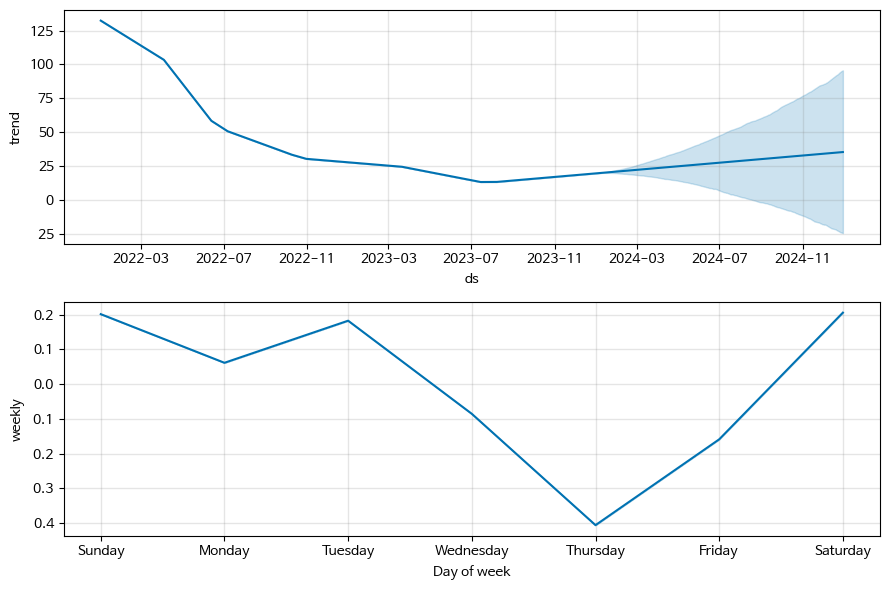

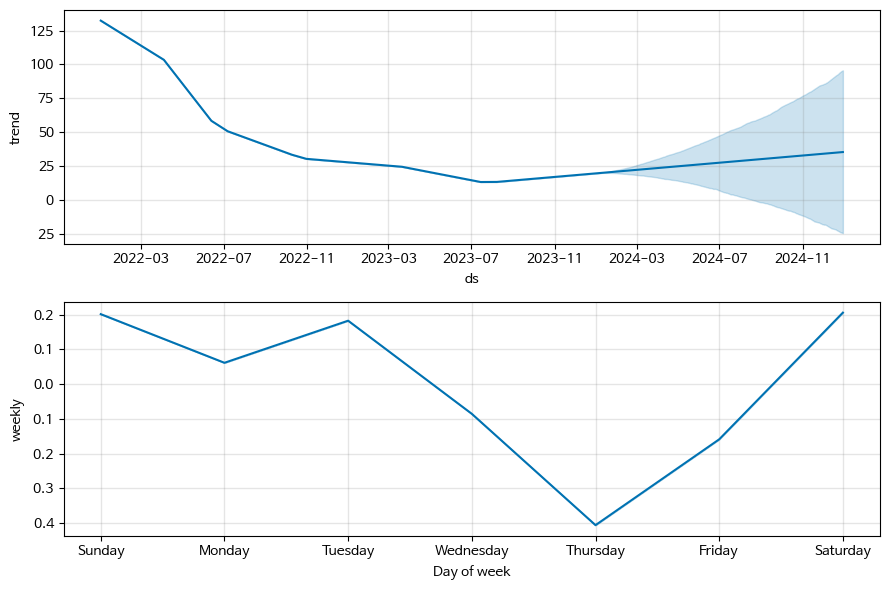

In [62]:
model_unai.plot_components(forecast_un)

## 주가 예측

In [63]:
df_stock = pd.DataFrame()
df_stock['ds'] = pola_stock_total['date']
df_stock['y'] = pola_stock_total['end_price']


02:36:01 - cmdstanpy - INFO - Chain [1] start processing
02:36:03 - cmdstanpy - INFO - Chain [1] done processing


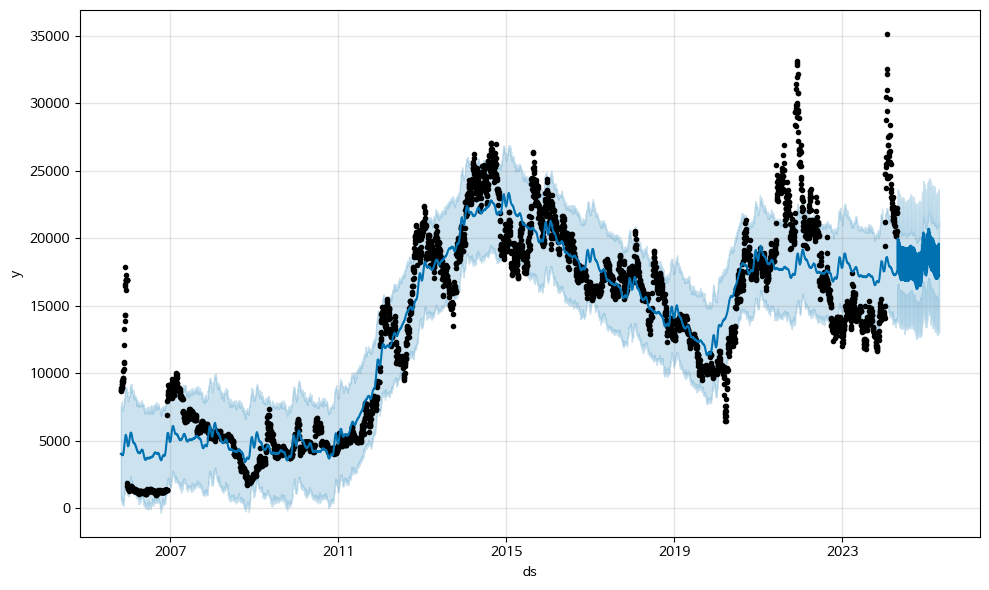

In [64]:
stock_model = Prophet()


stock_model.fit(df_stock)
future_dates_stock = stock_model.make_future_dataframe(periods=365)
forecast_stock = stock_model.predict(future_dates_stock)
fig_stock = stock_model.plot(forecast_stock)

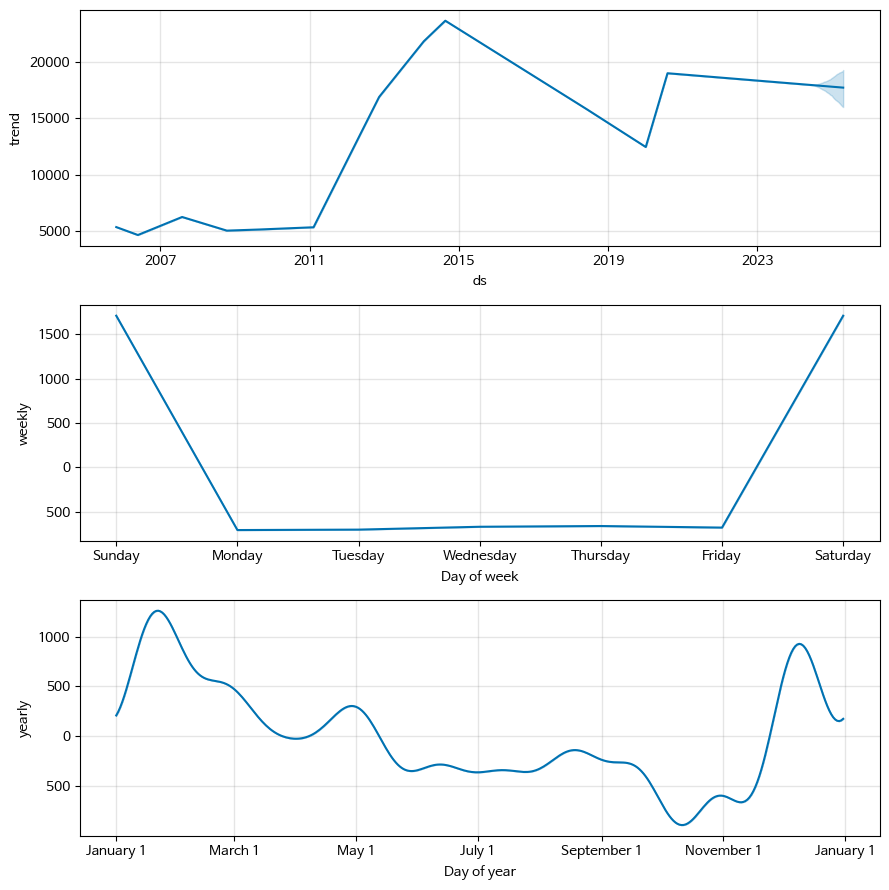

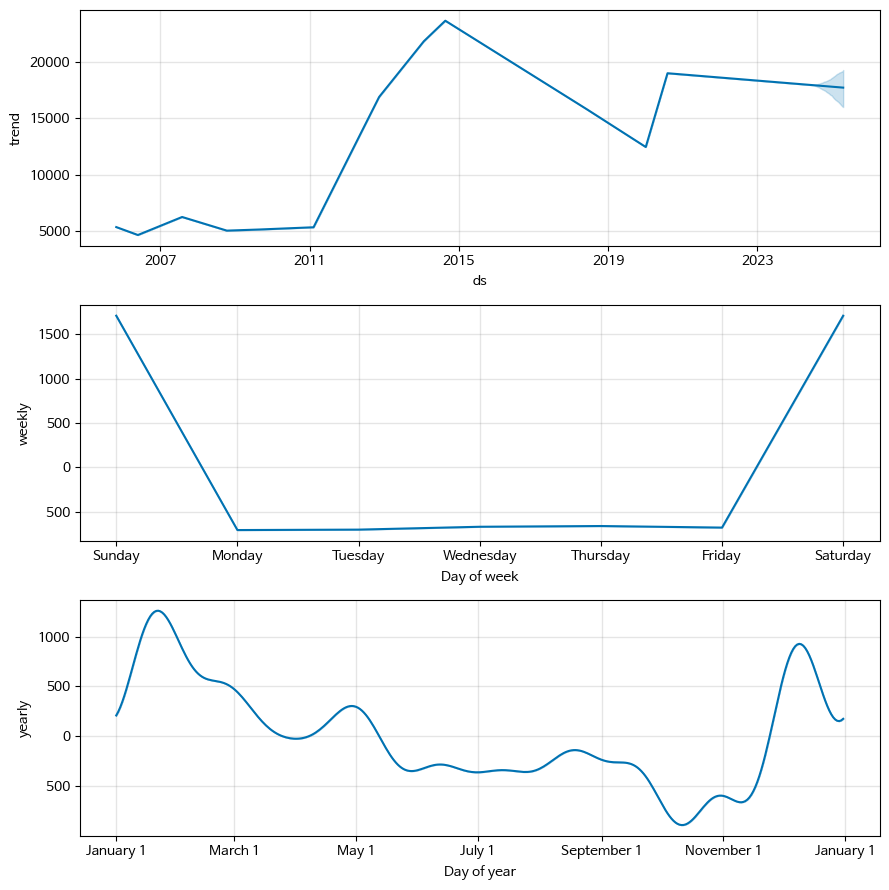

In [65]:
stock_model.plot_components(forecast_stock)
